<a href="https://colab.research.google.com/github/ahnjonghyunn/ABC/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%ED%83%91%EC%8A%B9%EC%9E%90_%EB%AA%85%EB%8B%A8%EC%9D%84_%ED%86%B5%ED%95%9C_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 탑승자 명단을 통한 생존자 예측

## 디카프리오는 정말 살 수 없었을까?

## 1.데이터 준비하기

In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 12.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [ ]:
raw_data = sns.load_dataset('titanic')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
raw_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 생존률 확인

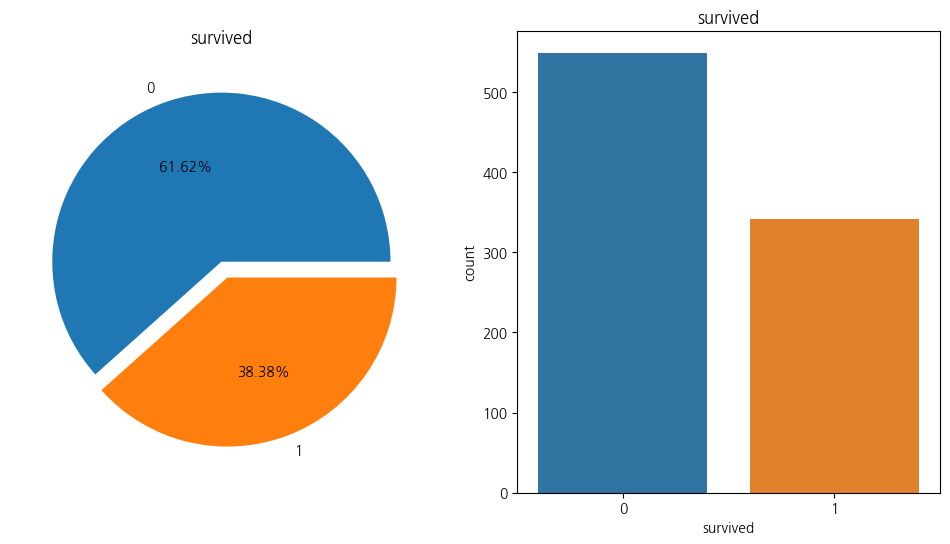

In [ ]:
f ,ax =  plt.subplots(1,2, figsize =(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0, 0.1],autopct = '%.2f%%', ax=ax[0] )
ax[0].set_title('survived')
ax[0].set_ylabel('')

sns.countplot(data=raw_data, x='survived', ax=ax[1])
ax[1].set_title('survived')
plt.show()


### 성별 생존률 확인

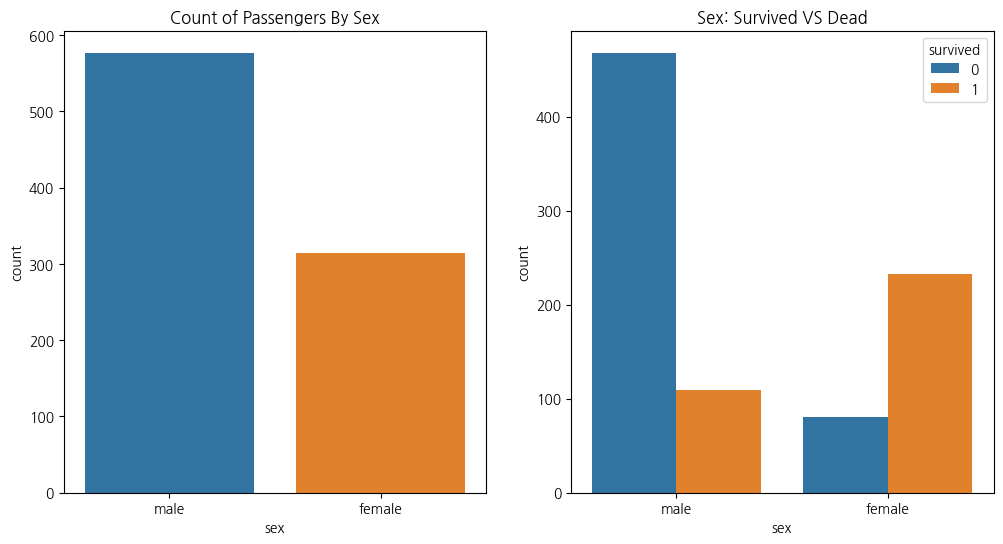

In [ ]:
f ,ax =  plt.subplots(1,2, figsize =(12,6))

sns.countplot(data=raw_data, x='sex', ax=ax[0])
ax[0].set_title('Count of Passengers By Sex')


sns.countplot(data=raw_data, x='sex',hue='survived', ax=ax[1])
ax[1].set_title('Sex: Survived VS Dead')
plt.show()

### 모든 컬럼에 대한 생존률 확인

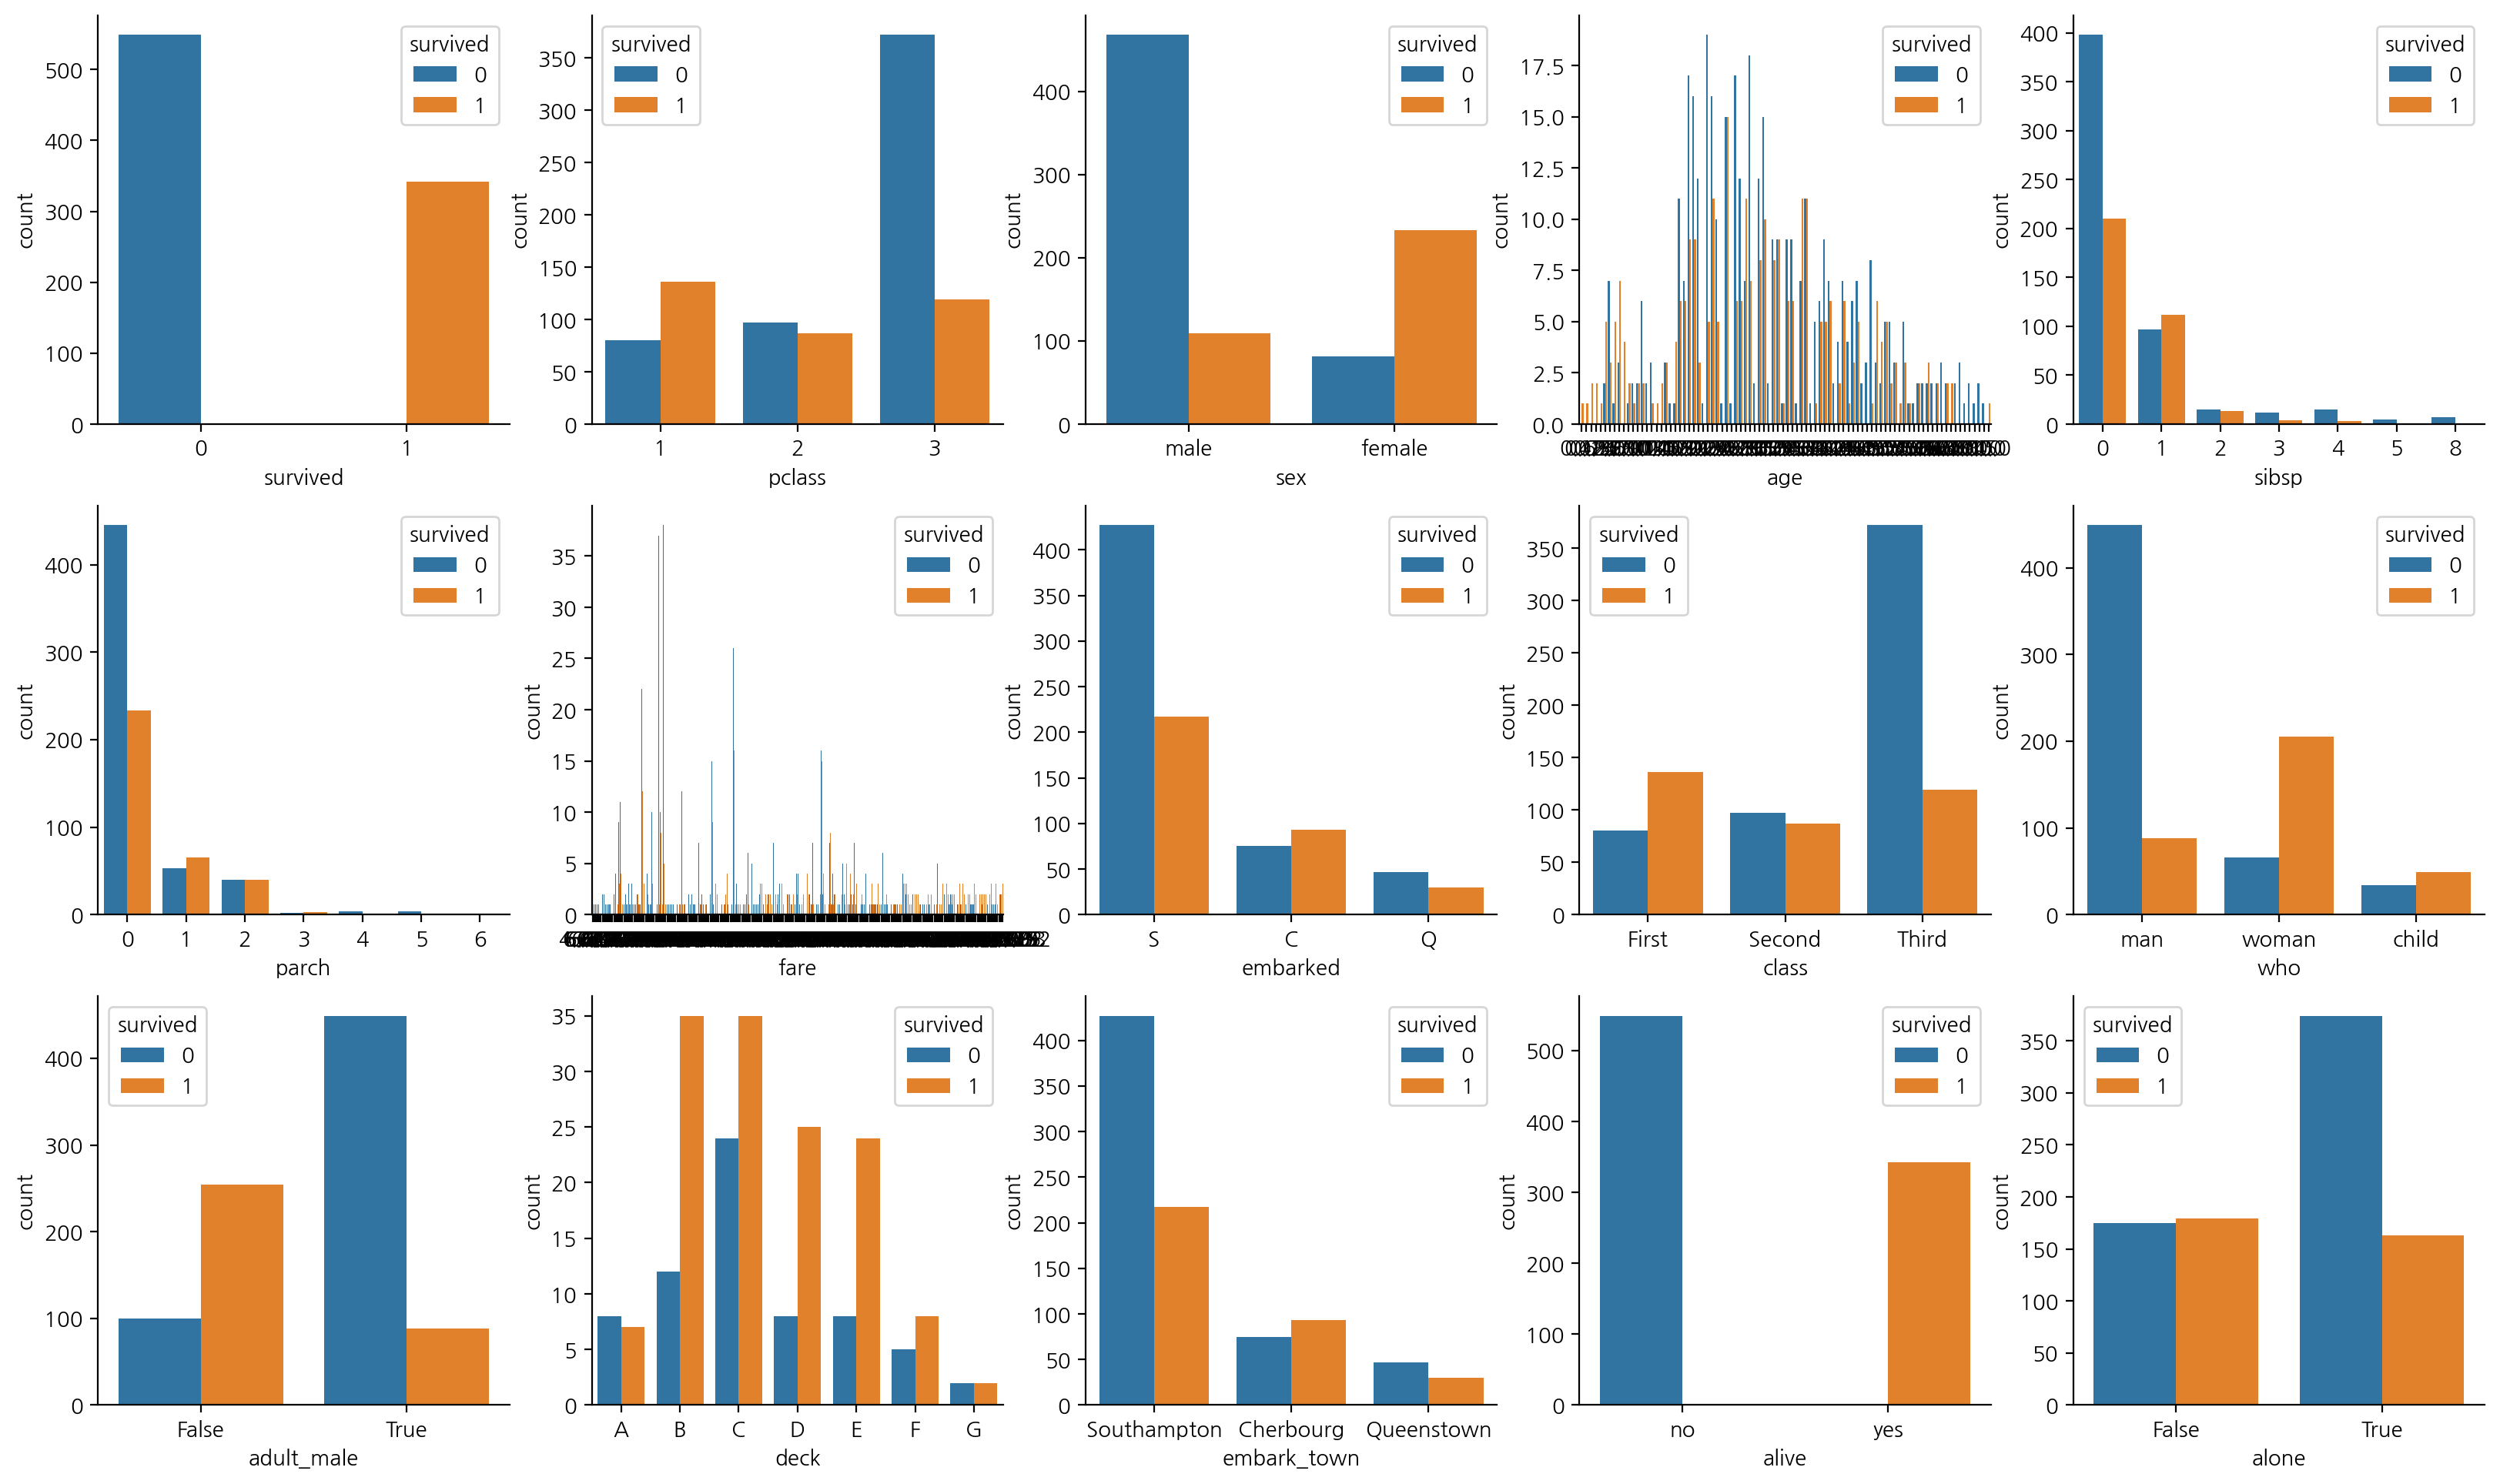

In [ ]:
attrs = raw_data.columns

plt.figure(figsize = (20,20), dpi = 200)

for i, feature in enumerate(attrs):
  plt.subplot(5,5, i+1)
  sns.countplot(data=raw_data, x=feature, hue='survived')

sns.despine()

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


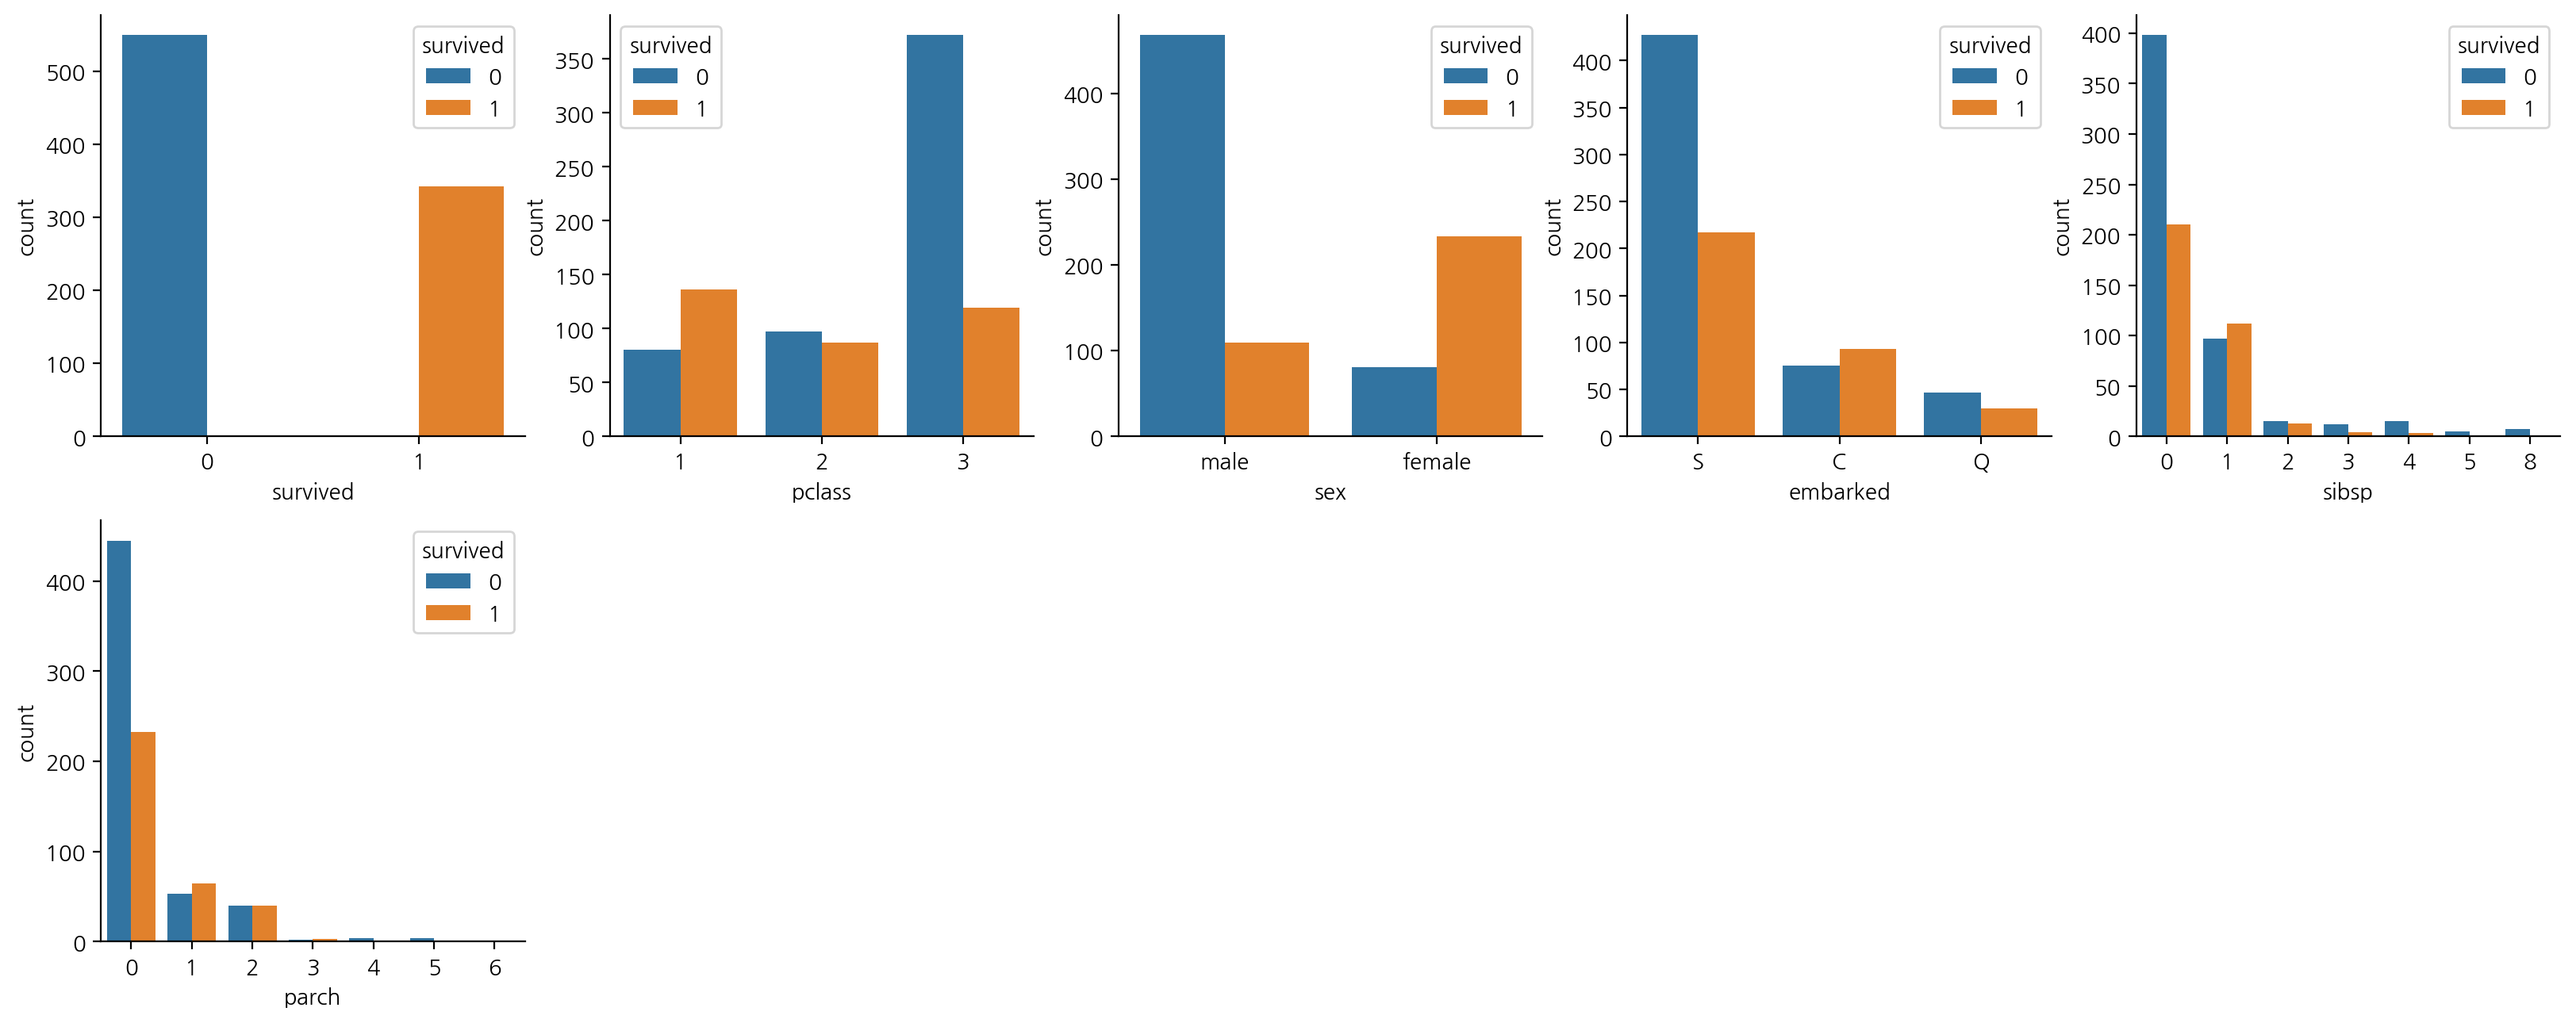

In [ ]:
attrs = ['survived','pclass','sex','embarked','sibsp','parch']

plt.figure(figsize = (20,20), dpi = 200)

for i, feature in enumerate(attrs):
  plt.subplot(5,5, i+1)
  sns.countplot(data=raw_data, x=feature, hue='survived')

sns.despine()


### 데이터 전처리

In [ ]:
# 결측지 확인
raw_data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# 1) 결측지 처리 방법 -> [삭제, 채우거나] deck(객실 데크 위치), embark_town 칼럼은 삭제
rdf = raw_data.drop(['deck','embark_town'], axis = 1)
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


In [ ]:
rdf.isna().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

In [ ]:
# 2) age 칼럼에 데이터가 없는 row 삭제 -> age NaN 177건 삭제
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
rdf.isna().sum()


survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [ ]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    714 non-null    int64   
 1   pclass      714 non-null    int64   
 2   sex         714 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       714 non-null    int64   
 5   parch       714 non-null    int64   
 6   fare        714 non-null    float64 
 7   embarked    712 non-null    object  
 8   class       714 non-null    category
 9   who         714 non-null    object  
 10  adult_male  714 non-null    bool    
 11  alive       714 non-null    object  
 12  alone       714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.6+ KB


In [ ]:
# 3) embarked 승선도기 NaN 2건 -> 승선 도기 중 가장 많이 출현한 도시로 설정
most_freq = rdf['embarked'].value_counts(dropna = True).idxmax() # 주의 dropna
# most_freq  'S'

rdf['embarked'].fillna(most_freq, inplace=True)

rdf.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [ ]:
# rdf['embarked'].value_counts(dropna=True)
# 4) 학습에 필요한 컬럼을 선택
# 생존여부, 객실 등급, 성별, 나이, 형제/자매수, 부모/자녀수,지불한 운임,  탑승도시
ndf = rdf[['survived','pclass', 'sex','age', 'sibsp','parch','fare','embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# 5) 문자로 되어 있는 값을 변환 -> 인코딩 -> 원핫 인코딩(범주형 데이터를 머신러닝 모델이 인식할 수 있도록 숫자형 변환)
# ex) male, female -> male[1, 0], female [0,1]
# ex) S[1. 0, 0], C[0, 1, 0], Q[0, 0 ,1]

# 5-1) 원핫 인코딩 만들기
onehot_sex = pd.get_dummies(ndf['sex'])
onehot_embarked = pd.get_dummies(ndf['embarked'])

# 5-2) ndf 데이터프레임에 연결
ndf = pd.concat([ndf, onehot_sex],axis=1)
ndf = pd.concat([ndf, onehot_embarked],axis=1)

ndf.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,female,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [ ]:
# 6) 기존 칼럼 삭제
ndf.drop(['sex','embarked'],axis=1, inplace=True)
ndf.head()


,survived,pclass,age,sibsp,parch,fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### 학습 데이터 셋 생성하기

In [ ]:
X = ndf.iloc[:, 1:] #survived를 제외(문제집, 독립변수, 피쳐) X는 다수 대문자
y = ndf.iloc[:, 0] #survived만 (정답지,종속변수,레이블) y소문자 주의


In [ ]:
# X , y실행
# 학습 데이터(학습 시 사용), 테스트 데이터(성능평가 시 사용, 10%) 선별

from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=777)


In [ ]:
X_train.shape #(rows , coulmns)

(642, 10)

In [ ]:
X_test.shape

(72, 10)

##2.모델 구성하기

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(255, input_shape=(10,), activation='relu')) #첫번째 층 255에서 점점 줄어들게 relu역할 책 찾아보기
model.add(Dense(1, activation='sigmoid'))# 시그노이드 그래프



##3. 모델 설정하기

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])



##4.모델 학습하기

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100) ##손실값이 (loss)떨어지는지 정확도(accuracy)올라가는지 확인


Epoch 1/100
21/21 [==============================] - 3s 33ms/step - loss: 0.6938 - accuracy: 0.6589 - val_loss: 0.6183 - val_accuracy: 0.5694
Epoch 2/100
21/21 [==============================] - 0s 14ms/step - loss: 0.6043 - accuracy: 0.7150 - val_loss: 0.5905 - val_accuracy: 0.6944
Epoch 3/100
21/21 [==============================] - 0s 11ms/step - loss: 0.5416 - accuracy: 0.7259 - val_loss: 0.5409 - val_accuracy: 0.7222
Epoch 4/100
21/21 [==============================] - 0s 10ms/step - loss: 0.5489 - accuracy: 0.7227 - val_loss: 0.6361 - val_accuracy: 0.6111
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 0.6846 - accuracy: 0.6807 - val_loss: 0.7011 - val_accuracy: 0.6250
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5769 - accuracy: 0.7243 - val_loss: 0.5588 - val_accuracy: 0.6944
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 0.5003 - accuracy: 0.7741 - val_loss: 0.5373 - val_accuracy: 0.6944
Epoch 8/1

##5. 성능 평가

###학습 결과 그리기

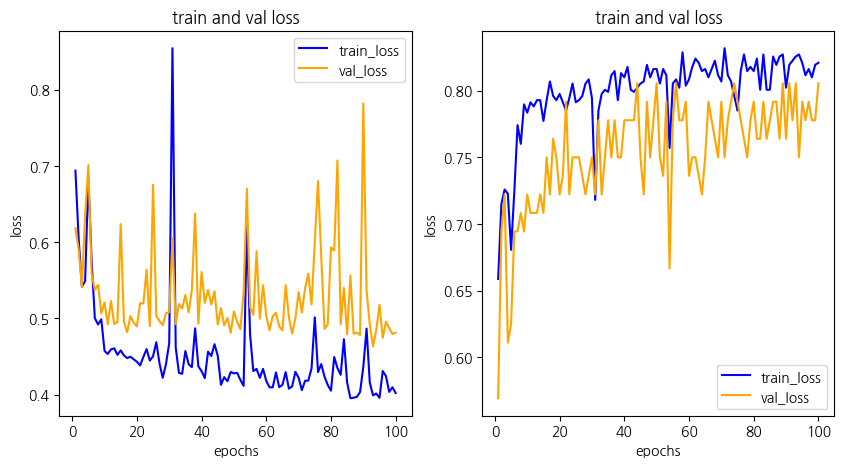

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

### 모델 평가하기

In [ ]:
scores=model.evaluate(X_test, y_test)
print('%s: %.2f%%' % (model.metrics_names[1],scores[1]*100))


3/3 [==============================] - 0s 5ms/step - loss: 0.4812 - accuracy: 0.8056
accuracy: 80.56%


### 드카프리오 정말 살 수 없었을까?




In [ ]:
# pclass	age	sibsp	parch	fare female	male	C	Q	S
#3등실 탑승, 남성, 19살, 형제없고, 부모나 자녀없음, 싼 가격으로 표를 삼, 사우스햄튼에서 탑승
dicaprio = np.array([3., 19, 0., 0., 0., 0., 1., 0., 0., 1]).reshape(1,10)

#1등실 탑승, 여성, 17살, 부모와 함께 탑승하고, 약혼자도 있었다, 운임은 비싸게 주었고, 사우스햄튼에서 탑승
winslet = np.array([1., 17., 1., 2., 500., 1., 0, 0., 0, 1 ]).reshape(1,10)

In [ ]:
d_predict = model.predict(dicaprio)
print('디카프리오의 생존 예측 : %.2f%%' % (d_predict * 100))


1/1 [==============================] - 0s 99ms/step
디카프리오의 생존 예측 : 23.30%


In [ ]:
w_predict = model.predict(winslet)
print('윈슬렛의 생존 예측 : %.2f%%' % (w_predict * 100))

1/1 [==============================] - 0s 24ms/step
윈슬렛의 생존 예측 : 70.31%
